In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/bursteinalan/Data-Sets/master/Housing/House%20Prediction%20Data.csv"

housing = pd.read_csv(url) 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

<AxesSubplot:title={'center':'Histogram of Sale Price'}, ylabel='Frequency'>

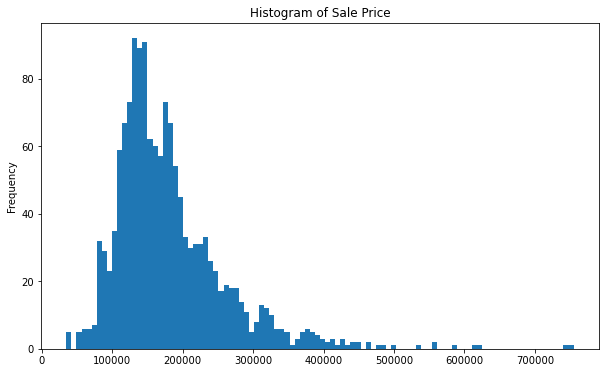

In [70]:
housing.SalePrice.plot(kind="hist", bins = 100, title = "Histogram of Sale Price", figsize = (10,6))

Clearly there are quite a few outliers. To examine further before proceeding to linear regression, we plot  a scatter plot of Sale Price with the variables of interest.

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

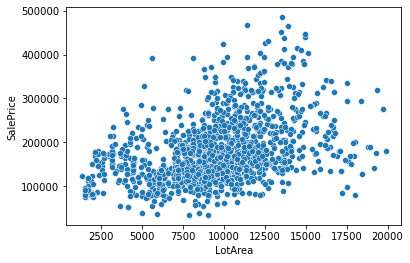

In [5]:
df = housing[["SalePrice", "LotArea"]]
df

df = df[df["LotArea"] <20000]
df = df[df["SalePrice"] < 500000]

sns.scatterplot(data = df, x = "LotArea", y = "SalePrice")


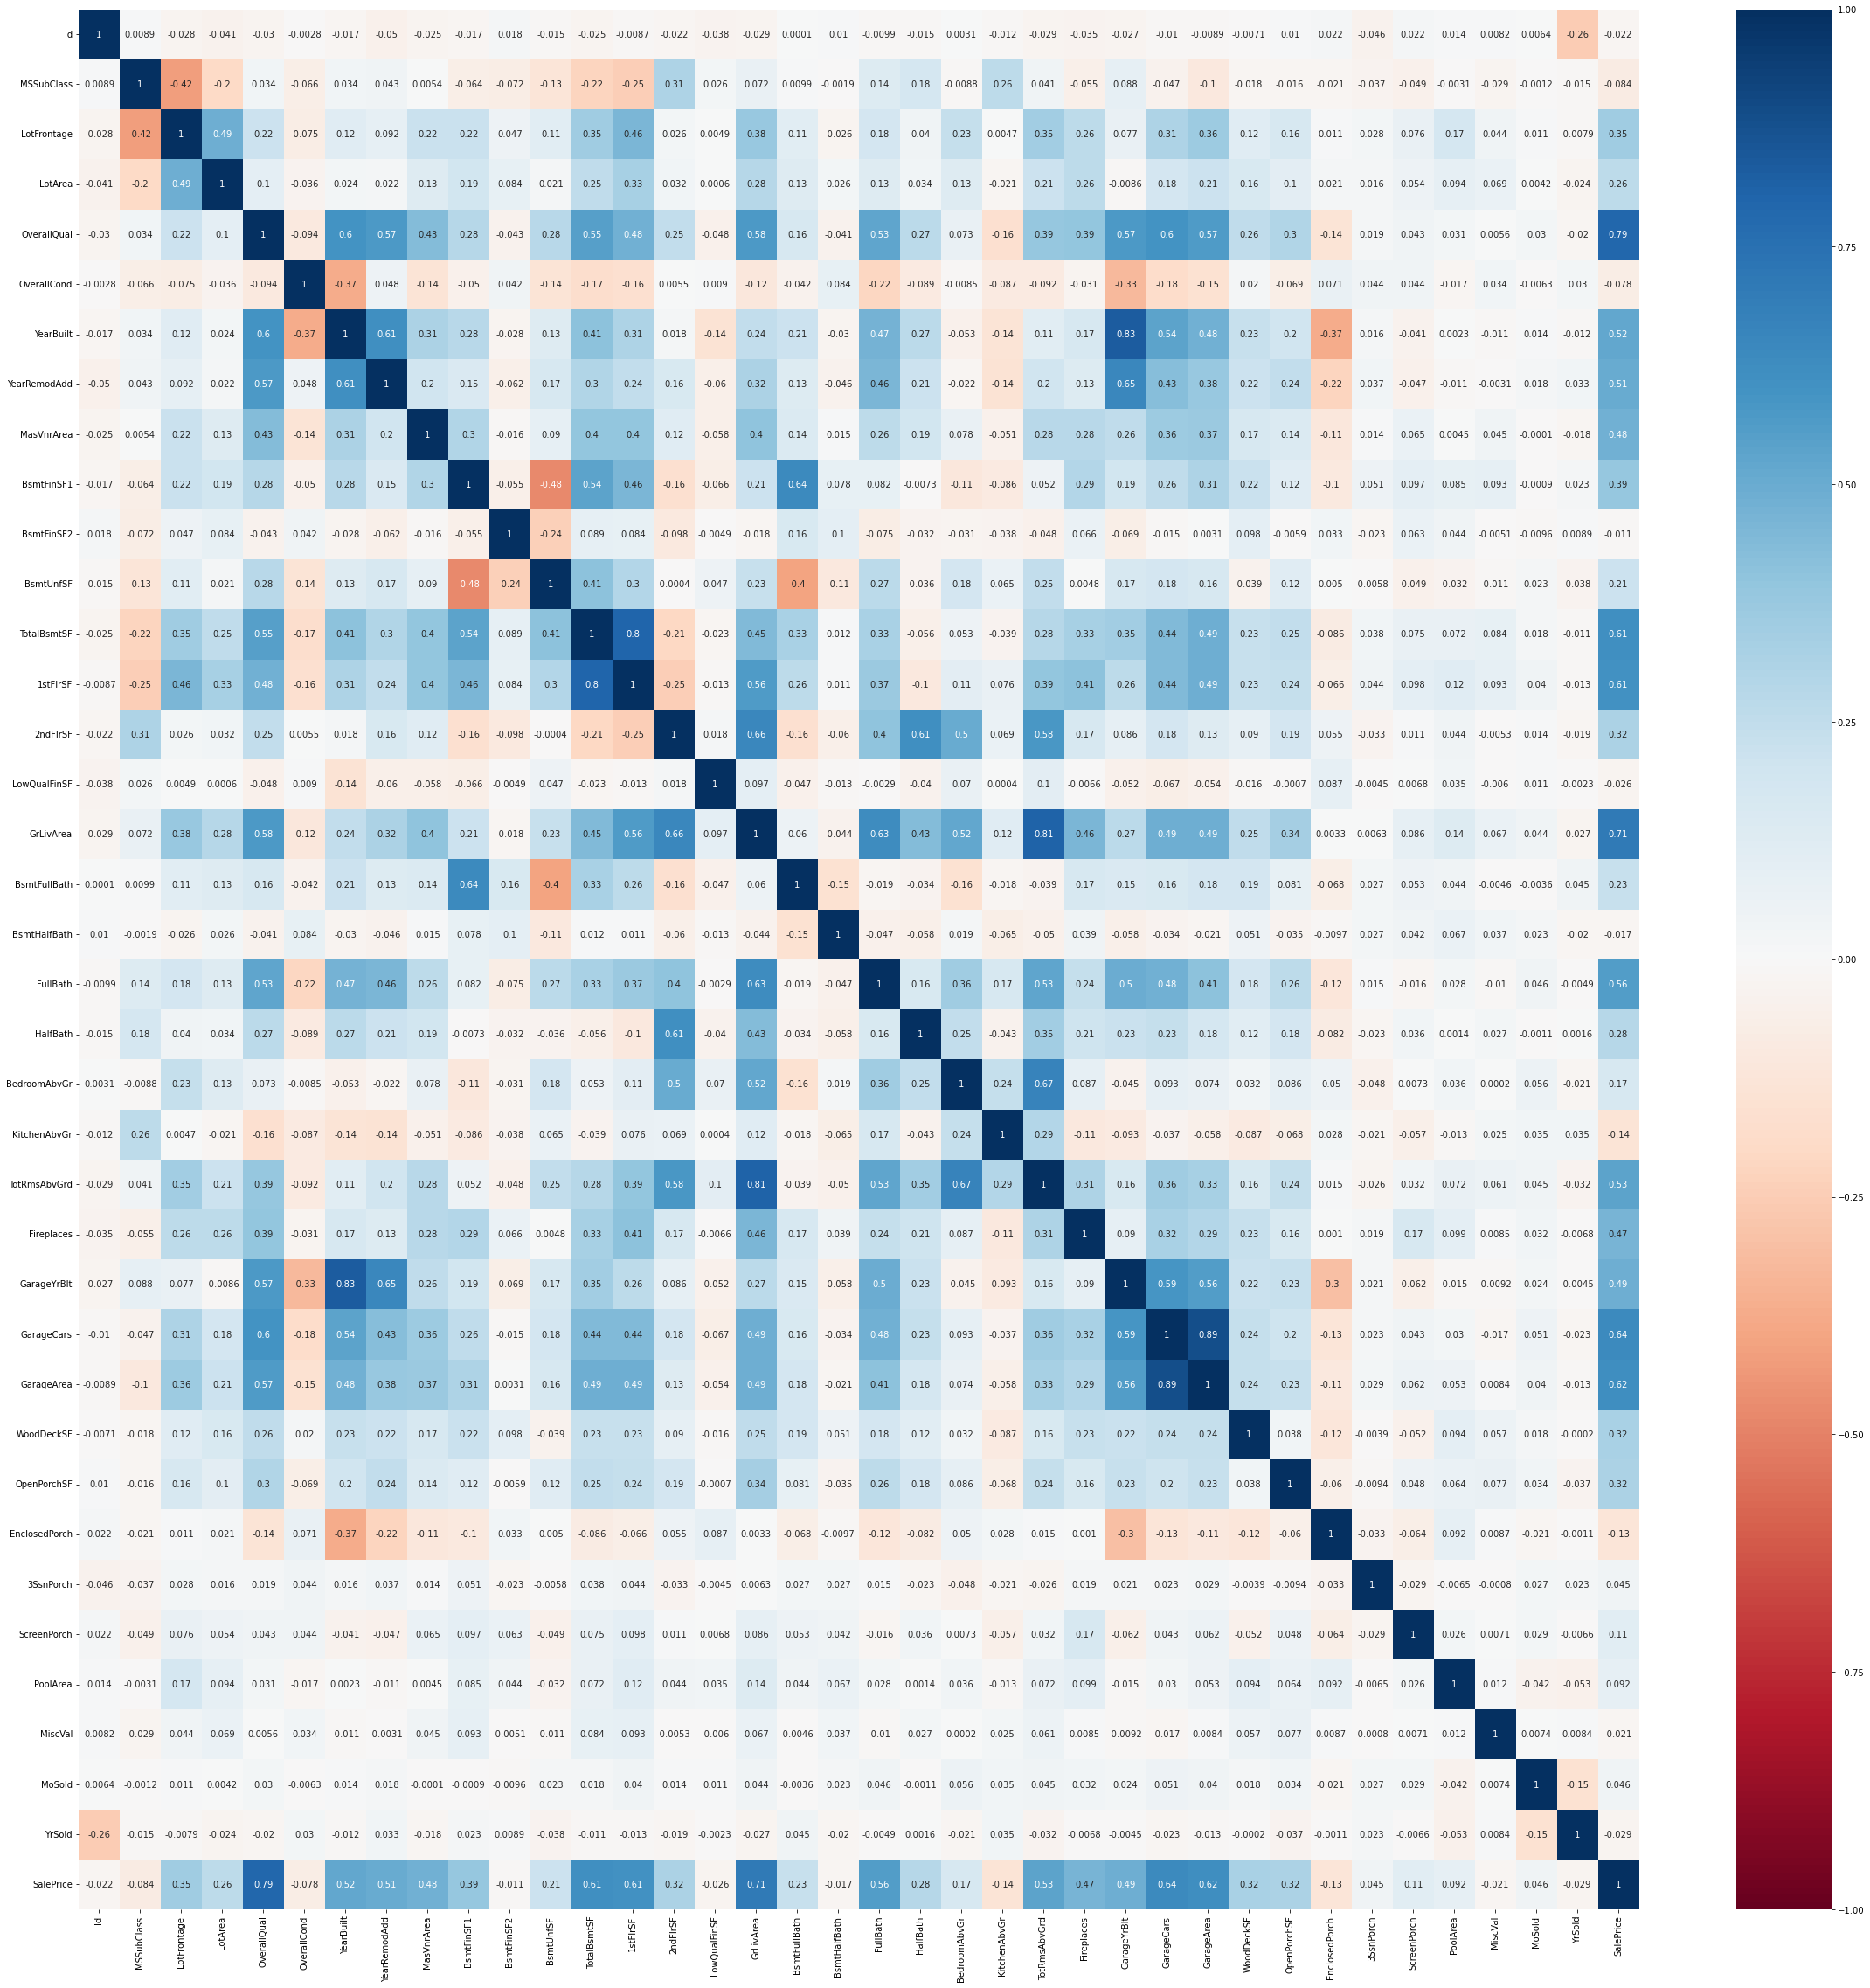

In [108]:
plt.figure(figsize=(40, 40))
heatmap = sns.heatmap(housing.corr().round(decimals=4),vmin=-1,annot=True, cmap='RdBu')



To find varibles that are correlated with SalePrice


<AxesSubplot:>

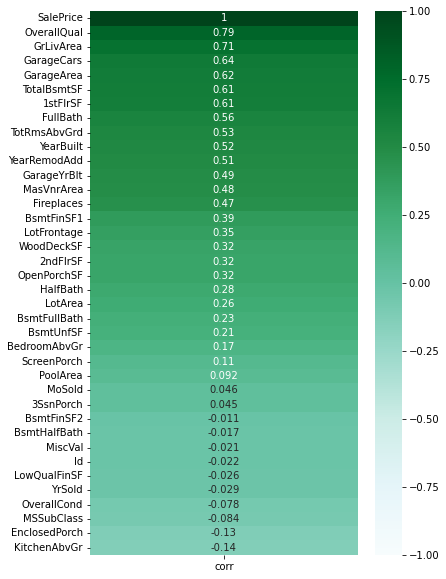

In [90]:
saleprice_correlation = pd.DataFrame(housing.corrwith(housing.SalePrice), columns = ["corr"])

saleprice_correlation.sort_values(by="corr", ascending=False)

plt.figure(figsize=(6,10))
sns.heatmap(saleprice_correlation.sort_values(by="corr", ascending=False), 
            vmin=-1, annot=True, cmap='BuGn')

Continous variables which have high correlation with SalePrice can be used in multiple regression.


<AxesSubplot:ylabel='Frequency'>

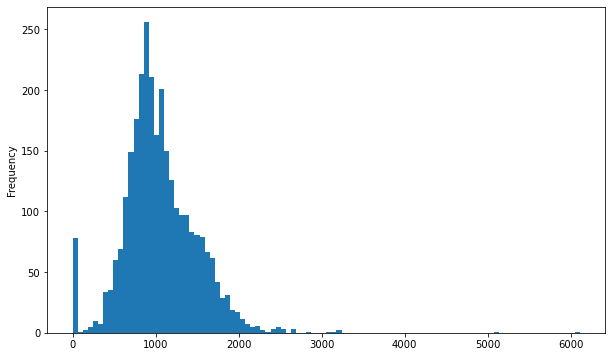

In [68]:
housing.TotalBsmtSF.plot(kind="hist", bins = 100, figsize = (10,6))

<AxesSubplot:ylabel='Frequency'>

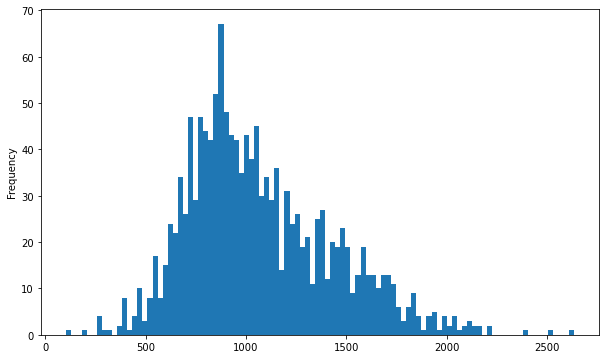

In [67]:
df_1 = housing[["SalePrice", "TotalBsmtSF"]]

#df_1.TotalBsmtSF.plot(kind="hist", bins = 100) #checked for outliers and removed them

df_1 = df_1[df_1["TotalBsmtSF"] < 3000]

df_1 = df_1[df_1["TotalBsmtSF"] > 0] #doesn't make sense that area of Basement is 0

df_1 = df_1[df_1["SalePrice"] < 500000]

df_1.TotalBsmtSF.plot(kind="hist", bins = 100,  figsize = (10,6))

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

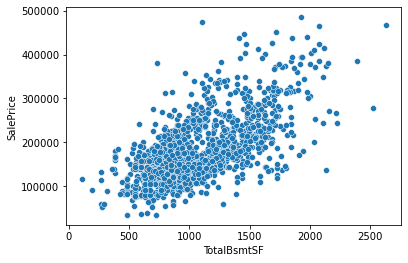

In [40]:
sns.scatterplot(data = df_1, x = "TotalBsmtSF", y = "SalePrice")

In [48]:
df_1 = df_1.dropna() #Drop NA values


X = df_1['TotalBsmtSF'].to_numpy().reshape(1410,1)
y = df_1['SalePrice'].to_numpy().reshape(1410,1)

reg_bsmt_saleprice = LinearRegression().fit(X,y) #fitting the regression model to our variables of interest

reg_bsmt_saleprice.coef_ #coefficient of the regression or the beta1 hat value

reg_bsmt_saleprice.intercept_ #the constant value, although it doesn't make sense in this context

reg_bsmt_saleprice.predict(np.array([[10000]]))

plt.scatter(X,y, alpha = 0.2)
plt.plot(X, reg_bsmt_saleprice.predict(X), color = "Red")
plt.title("Regression line")

array([[123.92638859]])

In [17]:
reg_bsmt_saleprice.score(X,y)

0.39922072070202497

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

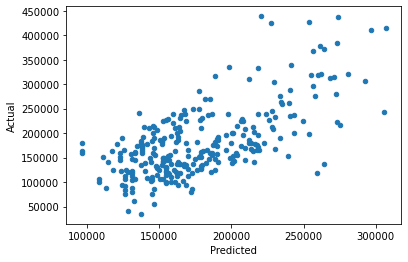

In [105]:
from sklearn.model_selection import train_test_split
# Now that we have performed simple linear regression above with SalePrice as the Dependent Variable and 
# TotalBsmtSF as the independent variable, to further improve the model, we train the data and and imporve the model.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

regression = LinearRegression()
regression.fit(X_train, y_train)

regression.intercept_

regression.coef_

y_pred = regression.predict(X_test)

y_pred_compare = ({'Actual': y_test, 'Predicted': y_pred})

Predicted = np.array(y_pred)
Actual = np.array(y_test)

display = pd.DataFrame({'Predicted': list(Predicted), 'Actual': list(Actual)})

display

display.plot(kind="scatter", x= "Predicted", y = "Actual")



To explore variables that have high correlation with SalePrice

<AxesSubplot:ylabel='Frequency'>

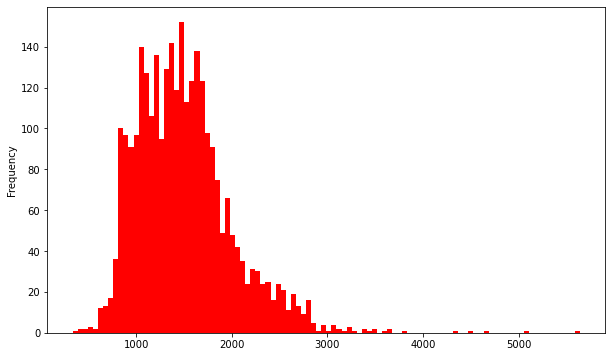

In [92]:
housing.GrLivArea.plot(kind="hist", bins = 100, figsize = (10,6), color = "Red")

<AxesSubplot:>

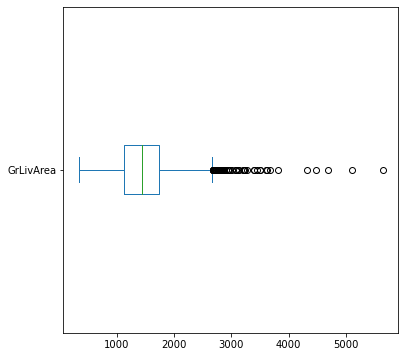

In [37]:
housing.GrLivArea.plot(kind="box", vert = False, figsize = (6,6))

<AxesSubplot:ylabel='Frequency'>

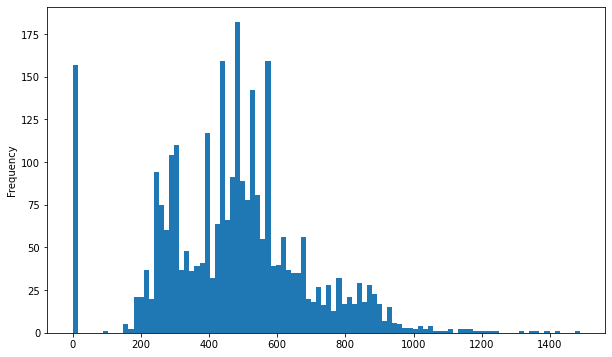

In [93]:
housing.GarageArea.plot(kind="hist", bins = 100, figsize = (10,6))

<AxesSubplot:>

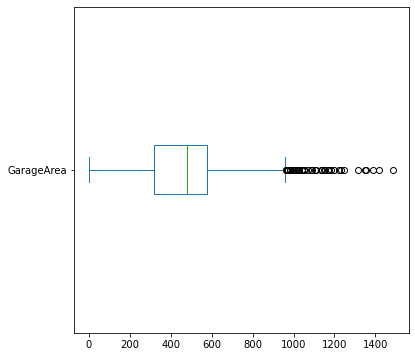

In [42]:
housing.GarageArea.plot(kind="box", vert = False, figsize = (6,6))

<AxesSubplot:ylabel='Frequency'>

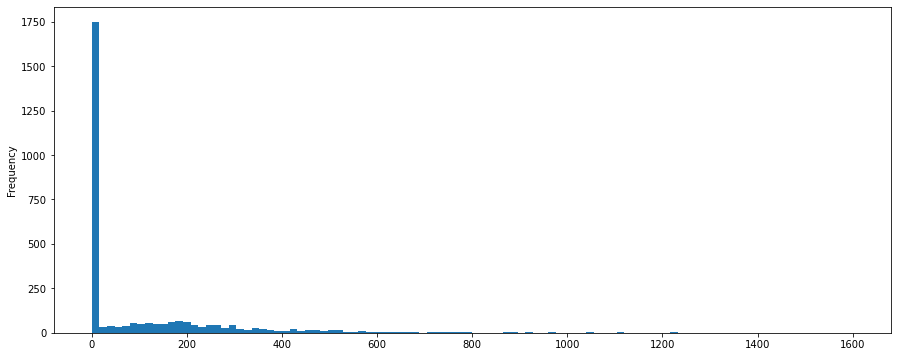

In [87]:
housing.MasVnrArea.plot(kind="hist", bins = 100, figsize = (15,6))